## Housing price prediction

In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv("data.csv")

In [3]:
# Get a glance at the data
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
# Check entries of each type. Check for any missing data.
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
# Printing the null value count of each field
print("Null values count:\n", housing.isnull().sum())

Null values count:
 CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         5
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


<AxesSubplot:>

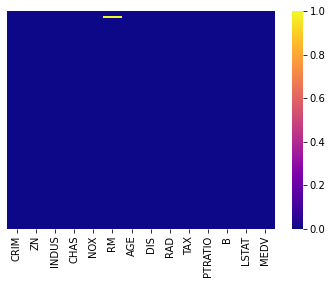

In [6]:
import seaborn as sb
sb.heatmap(housing.isnull(), yticklabels = False, cbar = True, cmap = 'plasma')

In [7]:
#Count the value of each type
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [8]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.287920,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705287,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.211000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.629000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [9]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [10]:
import matplotlib.pyplot as plt

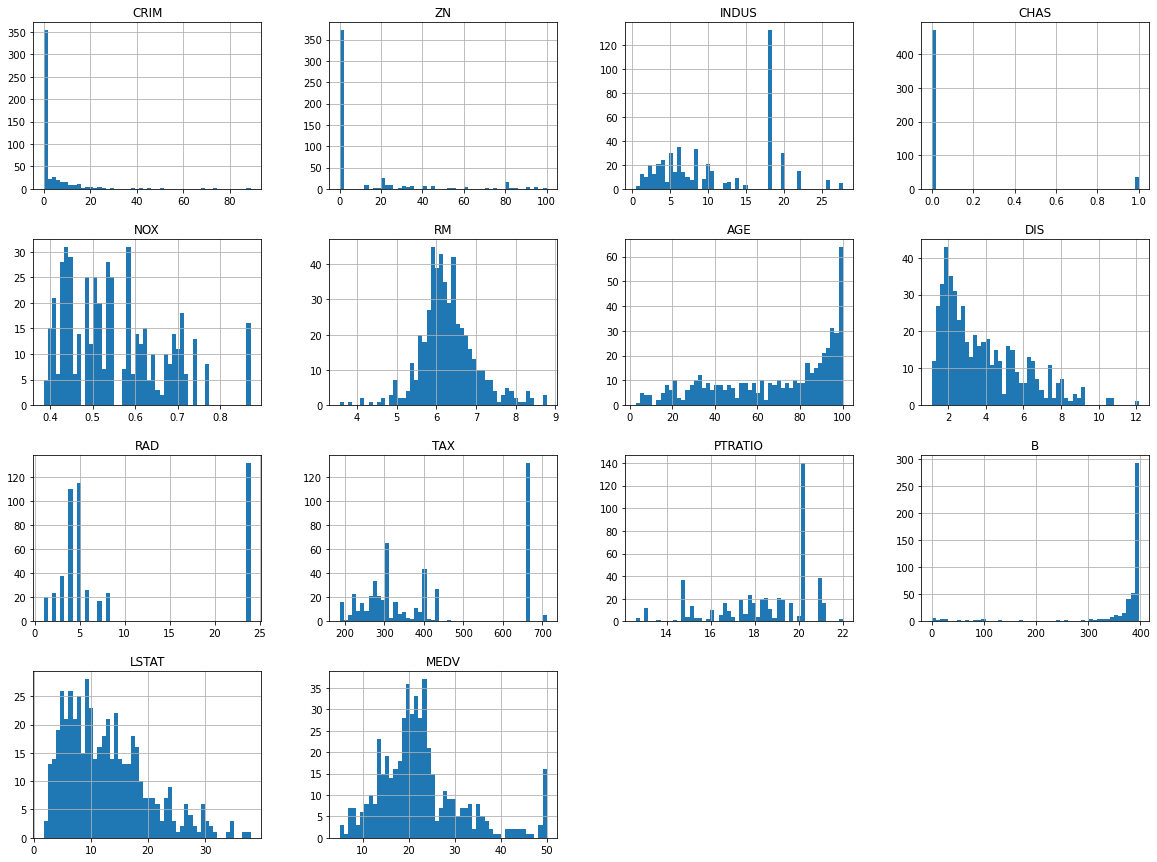

In [11]:
housing.hist(bins = 50, figsize = (20, 15))
plt.show()

In [12]:
from sklearn .model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size = 0.2, random_state=42)

In [13]:
test_set

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
173,0.09178,0.0,4.05,0,0.510,6.416,84.1,2.6463,5,296,16.6,395.50,9.04,23.6
274,0.05644,40.0,6.41,1,0.447,6.758,32.9,4.0776,4,254,17.6,396.90,3.53,32.4
491,0.10574,0.0,27.74,0,0.609,5.983,98.8,1.8681,4,711,20.1,390.11,18.07,13.6
72,0.09164,0.0,10.81,0,0.413,6.065,7.8,5.2873,4,305,19.2,390.91,5.52,22.8
452,5.09017,0.0,18.10,0,0.713,6.297,91.8,2.3682,24,666,20.2,385.09,17.27,16.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,18.81100,0.0,18.10,0,0.597,4.628,100.0,1.5539,24,666,20.2,28.79,34.37,17.9
436,14.42080,0.0,18.10,0,0.740,6.461,93.3,2.0026,24,666,20.2,27.49,18.05,9.6
411,14.05070,0.0,18.10,0,0.597,6.657,100.0,1.5275,24,666,20.2,35.05,21.22,17.2
86,0.05188,0.0,4.49,0,0.449,6.015,45.1,4.4272,3,247,18.5,395.99,12.86,22.5


In [14]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['CHAS']):
    strat_train_data = housing.loc[train_index]
    strat_test_data = housing.loc[test_index]

In [15]:
strat_train_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,3.53501,0.0,19.58,1,0.871,6.152,82.6,1.7455,5,403,14.7,88.01,15.02,15.6
423,7.05042,0.0,18.10,0,0.614,6.103,85.1,2.0218,24,666,20.2,2.52,23.29,13.4
98,0.08187,0.0,2.89,0,0.445,7.820,36.9,3.4952,2,276,18.0,393.53,3.57,43.8
455,4.75237,0.0,18.10,0,0.713,6.525,86.5,2.4358,24,666,20.2,50.92,18.13,14.1


In [16]:
housing  = strat_train_data.copy()

In [17]:
strat_train_data['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

## Correlation

In [18]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending = False)

MEDV       1.000000
RM         0.679821
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

array([[<AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='ZN', ylabel='RM'>,
        <AxesSubplot:xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='RM'>],
       [<AxesSubplot:xlabel='RM', ylabel='ZN'>,
        <AxesSubplot:xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot:xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='ZN'>],
       [<AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='ZN', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

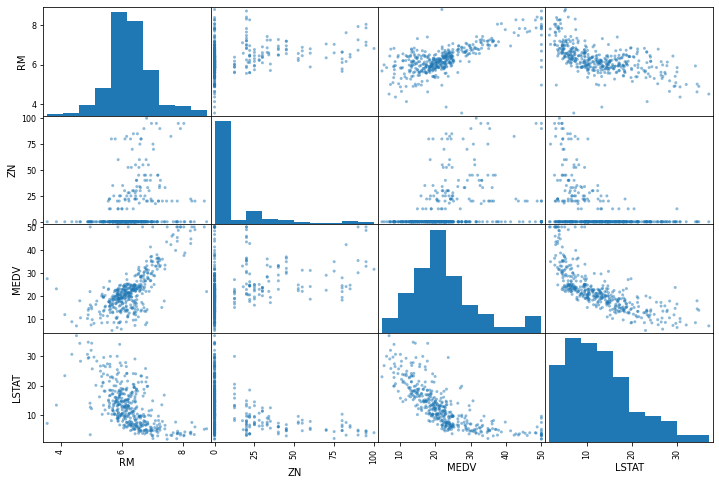

In [19]:
from pandas.plotting import scatter_matrix
attributes = ['RM', 'ZN', 'MEDV', 'LSTAT']
scatter_matrix(housing[attributes], figsize=(12, 8))

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

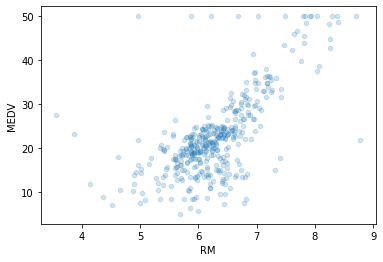

In [20]:
housing.plot(kind='scatter', x='RM', y='MEDV', alpha=0.2)

## Attribute combination

In [21]:
housing['TAXRM'] = housing['TAX'] / housing['RM']
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


In [22]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.679821
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
TAXRM     -0.527643
LSTAT     -0.740494
Name: MEDV, dtype: float64

<AxesSubplot:xlabel='TAXRM', ylabel='MEDV'>

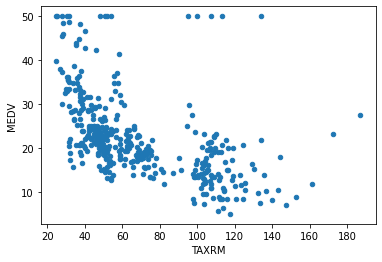

In [23]:
housing.plot(kind='scatter', x='TAXRM', y='MEDV', alpha=1)

In [24]:
housing = strat_train_data.drop('MEDV', axis=1)
housing_labels = strat_train_data['MEDV'].copy()

## Missing attributes

In [25]:
# There are three options to take care of missing attributes:
# 1. Get rid of the missing data points
# 2. Get rid of the whole attribute
# 3. Set the missing values to 0 or mean or median

In [26]:
# Option 1
# Till we mention emplace=True no changes will be made to the housing data
# and it will just return a copy of the new data
a = housing.dropna(subset=['RM'])
a.shape

(400, 13)

In [27]:
#Option 2
housing.drop("RM", axis=1).shape
# Note that the RM column will be dropped in the newly obtained copy of housing data
# The number of columns is reduced to 14 from 15
# Also note that the original housing data will remain unchanged

(404, 12)

In [28]:
median = housing['RM'].median()
median

6.2175

In [29]:
# Option 3
housing['RM'].fillna(median)

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [30]:
housing['RM'].shape

(404,)

In [31]:
housing.shape

(404, 13)

In [32]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,400.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.283138,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.715738,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.217500,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.632000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [33]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median')
imputer.fit(housing)

SimpleImputer(strategy='median')

In [34]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.21750e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [35]:
x = imputer.transform(housing)

In [36]:
housing_new = pd.DataFrame(x, columns=housing.columns)
housing_new.shape

(404, 13)

In [37]:
housing_new.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.282488,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712207,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.879750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.217500,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


## Pipeline

In [38]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
myPipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std scaler', StandardScaler())
])

In [39]:
housing_num_new = myPipeline.fit_transform(housing_new)

In [40]:
housing_num_new

array([[-0.43942006,  3.12628155, -1.12165014, ..., -0.97491834,
         0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, ..., -0.69277865,
         0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.81196637,
         0.44624347,  0.81480158],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ..., -0.22254583,
         0.41831233, -1.27603303],
       [ 0.14210728, -0.4898311 ,  0.98336806, ...,  0.81196637,
        -3.15239177,  0.73869575],
       [-0.43974024, -0.4898311 ,  0.37049623, ..., -0.97491834,
         0.41070422,  0.09940681]])

In [41]:
housing_num_new.shape

(404, 13)

## Selecting a model

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
# model = LinearRegression()
# model = DecisionTreeRegressor()
# model = AdaBoostRegressor()
model = RandomForestRegressor()
model.fit(housing_num_new, housing_labels)

RandomForestRegressor()

In [43]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]

In [44]:
prepared_data = myPipeline.transform(some_data)

In [45]:
model.predict(prepared_data)

array([22.223, 25.421, 16.529, 23.328, 23.592])

In [46]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

## Model evaluation

In [47]:
import numpy as np
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_new)
mse = mean_squared_error(housing_labels, housing_predictions)
rmse = np.sqrt(mse)

In [48]:
mse

1.3816390965346521

## Using better evaluation technique: Cross validation

In [49]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_new, housing_labels, scoring='neg_mean_squared_error', cv=10)
rmse_scores = np.sqrt(-scores)

In [50]:
rmse_scores

array([2.69816073, 2.92347741, 4.59752525, 2.67373523, 3.65121384,
       2.64983709, 4.5855021 , 3.32334258, 3.27946439, 3.35659015])

In [51]:
def print_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())

In [52]:
print_scores(rmse_scores)

Scores:  [2.69816073 2.92347741 4.59752525 2.67373523 3.65121384 2.64983709
 4.5855021  3.32334258 3.27946439 3.35659015]
Mean:  3.37388487606854
Standard deviation:  0.6875985024685175


## Store model

In [53]:
from joblib import dump, load
dump(model, 'Model.joblib')

['Model.joblib']

## Testing model against test data

In [54]:
x_test = strat_test_data.drop('MEDV', axis=1)
y_test = strat_test_data['MEDV'].copy()
x_ready = myPipeline.transform(x_test)
final_predictions = model.predict(x_ready)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [55]:
print(final_predictions, '\n', list(y_test))

[24.514 11.397 25.613 22.172 18.679 14.935 20.098 14.282 32.176 40.263
 19.427 11.728 24.552 27.421 19.582 11.044 31.925 14.547 23.579 18.725
 19.772 17.617 16.882 22.089 18.727 31.588 16.085 33.602  8.777 33.548
 24.683 21.652 22.835 10.797 21.019 11.22  41.498 24.378 23.436 41.467
 24.004 30.273 20.669 20.814 18.826 33.788 44.677 20.106 20.566 22.09
 20.572 14.652 21.336 15.046 24.99  33.277 42.593 29.155 19.308 21.136
 47.079 10.168 18.895 25.31  15.161 33.213 20.156 17.875 19.021 33.86
 26.574 22.943 21.275 22.244 34.916 13.062 15.626 20.244 20.731 21.737
 22.19  21.322 14.391 23.084 20.678 21.016 13.957 21.486 21.261 23.051
 18.541 27.22   7.18  26.312 19.24  30.068 19.948 31.135 14.429 26.921
 21.682 20.09 ] 
 [16.5, 10.2, 30.1, 23.0, 14.4, 15.6, 19.4, 14.1, 30.3, 35.2, 23.1, 13.8, 25.0, 27.9, 19.5, 12.3, 32.2, 13.5, 23.8, 21.7, 19.2, 19.5, 10.4, 23.2, 18.6, 28.5, 15.2, 32.0, 7.2, 34.6, 20.1, 20.6, 23.6, 13.1, 23.8, 12.7, 43.1, 24.7, 22.2, 44.0, 28.1, 31.0, 21.7, 23.4, 19.5, 33.1

In [56]:
final_rmse

2.9315392078993185

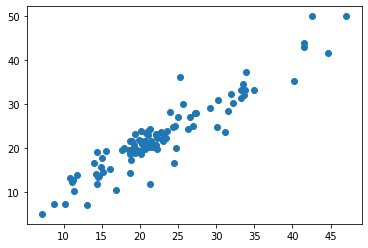

In [57]:
plt.scatter(final_predictions, list(y_test))
plt.show()

In [58]:
prepared_data[0]

array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24529952, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])

In [59]:
names = ['Decision Tree', 'Linear Regression', 'Ada Boost', 'Random Forest']
rmse = [4.50, 4.14, 3.56, 2.95]

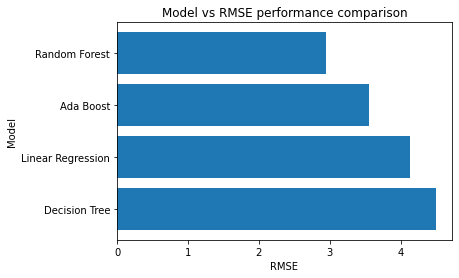

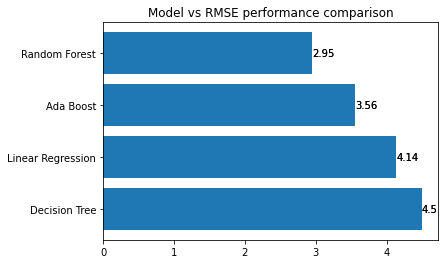

In [60]:
import matplotlib.pyplot as plt
plt.barh(names, rmse)
plt.title('Model vs RMSE performance comparison')
plt.xlabel('RMSE')
plt.ylabel('Model')
fig, ax = plt.subplots()
bars = ax.barh(names, rmse)
ax.bar_label(bars)
for bars in ax.containers:
    ax.bar_label(bars)
ax.title.set_text('Model vs RMSE performance comparison')
# for i, v in enumerate(rmse):
#     plt.text(v, i, str(round(value, 2))
# plt.show()